# Array indexing and slicing

# Array indexing: accessing single elements

A NumPy array is a homogenous multidimensional collection of elements indexed by a tuple of non-negative integers.

Indexing of elements in the array start at zero and a single element is accessed by specifying the desired index in square brackets `[ ]`.

In a multidimensional array, you access elements using a comma-separated tuple of indices.

**Example**: indexing a 1D array.

In [ ]:
import numpy as np

arr = np.arange(1, 4)

print(arr)
print(arr[1])

[1 2 3]
2


**Example**: indexing a 2D array.

In [ ]:
a = np.arange(1, 10)
arr = a.reshape(3, 3)

print(arr)
print(arr[1, 2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
6


**Example**: indexing a 3D array.

The 3D array in the example below can be thought of as three 2 x 3 matrices, drawn below with axes labelled for clarity.

<br><br>
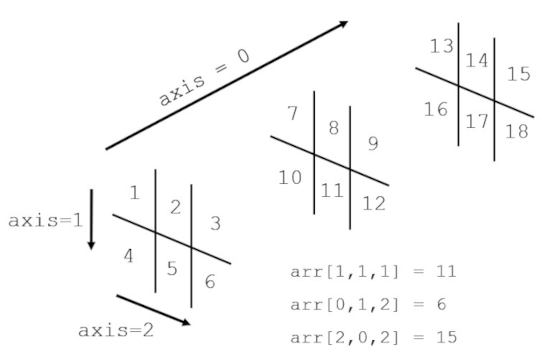
<br><br>

In [ ]:
a = np.arange(1, 19)
arr = a.reshape(3, 2, 3)

print(arr)
print(arr[1, 1, 1])
print(arr[0, 1, 2])
print(arr[2, 0, 2])

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]

 [[13 14 15]
  [16 17 18]]]
11
6
15


# Array slicing: accessing subarrays

Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the slice notation, marked by the colon ( `:` ) character.

The NumPy slicing syntax follows that of the standard Python list.

> Syntax
<font size="4">
```python
numpy_array[start:stop:step]
```
</font>

If any of the arguments are unspecified, they default to the values `start=0`, `stop=size` of dimension, `step=1`.

## One-dimensional subarrays

**Example**

In [ ]:
arr = np.arange(10)

# first five elements
print(arr[:5])

# elements after index 5
print(arr[5:])

# middle subarray
print(arr[4:7])

#  every other element
print(arr[::2])

[0 1 2 3 4]
[5 6 7 8 9]
[4 5 6]
[0 2 4 6 8]


## Multidimensional subarrays

Multidimensional slices work in the same way, with multiple slices separated by commas.

**Example**

In [ ]:
a = np.arange(1, 17)
arr = a.reshape(4, 4)

print(arr)

# two rows, three columns
print(arr[:2, :3])

# all rows, every other column
print(arr[::, ::2])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
[[1 2 3]
 [5 6 7]]
[[ 1  3]
 [ 5  7]
 [ 9 11]
 [13 15]]


## Accessing array rows and columns

One commonly needed routine is accessing a single row or column of an array.

You can do this by combining indexing and slicing, using an empty slice marked by a single colon ( `:` ).

**Example**

In [ ]:
a = np.arange(1, 17)
arr = a.reshape(4, 4)

print(arr)

# first column
print(arr[:, 0])

# first row
print(arr[0, :])

# compact syntax equivalent to arr[0, :]
# for row access
print(arr[0])

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
[ 1  5  9 13]
[1 2 3 4]
[1 2 3 4]


# Boolean indexing

<br><br>
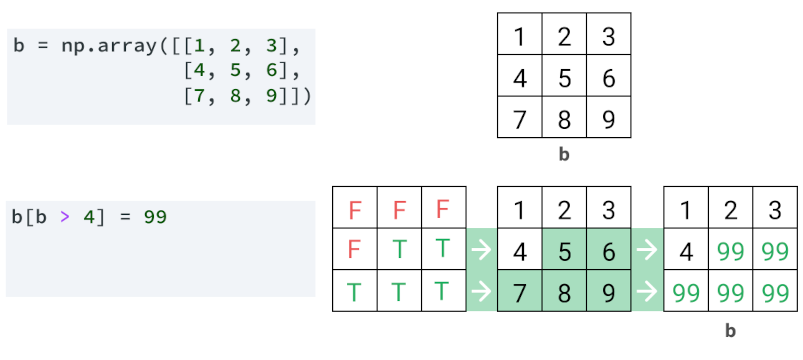
<br><br>

In [ ]:
a = np.arange(1, 10)
arr = a.reshape(3, 3)

print(arr)

arr_bool = arr > 4

print(arr_bool)

arr[arr_bool] = 99

print(arr)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[False False False]
 [False  True  True]
 [ True  True  True]]
[[ 1  2  3]
 [ 4 99 99]
 [99 99 99]]


Boolean indexing acts like a filter for your data, letting you select rows or columns based on conditions you define.

It works by creating a Boolean array—an array of `True` and `False` values—that matches the shape of your data.

It’s important to remember that Boolean arrays must have the same number of elements as the dimension they are filtering.

Wherever the condition is met, you get a True, and wherever it isn’t, you get a False.

Then, you use this Boolean array to select only the data you need.

To create a Boolean array, you use comparison operators.

## Comparison operators

As in the case of arithmetic operators, the comparison operators are implemented as *ufuncs* (universal functions) in NumPy.

For example, when you write `x < 3`, internally NumPy uses `np.less(x, 3)`.

A summary of the comparison operators and their equivalent ufunc is shown here:

| Operator| Equivalent ufunc|
|:---|:---|
| ==      | np.equal|
| !=      | np.not_equal|
| <       | np.less|
| <=      | np.less_equal|
| >       | np.greater|
| >=      | np.greater_equal|



## Load dataset from CSV file

We’ll be working with a dataset of taxi trips.

The key columns in the dataset are `pickup_year`, `pickup_month`, `pickup_day`, `pickup_time`, `trip_distance`, `fare_amount`, and `tip_amount`.

In [ ]:
# csv file location
url = 'https://dq-content.s3.amazonaws.com/290/nyc_taxis.csv'

# Load the dataset, skipping the header row
taxi = np.genfromtxt(url, delimiter=',', skip_header=1)

# specify format for print
np.set_printoptions(formatter={'float': '{: 0.0f}'.format})

print(taxi)

[[ 2016  1  1 ...  12  70  1]
 [ 2016  1  1 ...  8  54  1]
 [ 2016  1  1 ...  0  38  2]
 ...
 [ 2016  6  30 ...  5  63  1]
 [ 2016  6  30 ...  9  45  1]
 [ 2016  6  30 ...  0  55  2]]


**Example**: find all the taxi rides that occurred in January:

In [ ]:
# Extract the pickup month column
pickup_month = taxi[:, 1]

# creat boolean array
january_bool = pickup_month == 1

# filter dataset
january = pickup_month[january_bool]

# get the size of array
january_rides = january.shape[0]

print(january_rides)

800


In this code, we use `[:, 1]` to select the second column, which contains the month of each trip.

Here, `january_bool` is a Boolean array where each element is `True` if the corresponding month is January (i.e., 1), and `False` otherwise.

We then use this array to index the `pickup_month` array, selecting only the January rides.

The number of rows in january is the total number of rides in January.

The `ndarray.shape` property is usually used to get the current shape of an array, and returns a tuple of integers indicating the size of the array in each dimension.

**Example**: find all taxi rides where the tip amount is greater than 20 and the total fare is under 50:



In [ ]:
# extract relevant columns
tip_amount = taxi[:, 12]
total_fare = taxi[:, 13]

# create boolean array
high_tip_low_fare_bool = (tip_amount > 20) & (total_fare < 50)

# filter dataset
big_tip_rides = taxi[high_tip_low_fare_bool]

# specify format for print
np.set_printoptions(formatter={'float': '{: 0.0f}'.format})

print(big_tip_rides)

[[ 2016  3  4  5  1  4  3  9  832  24  1  0  25  49  1]]
